In [108]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import models, layers
import numpy as np

In [92]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=15

In [67]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(

  "Plant_village",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE

)

Found 2152 files belonging to 3 classes.


In [68]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

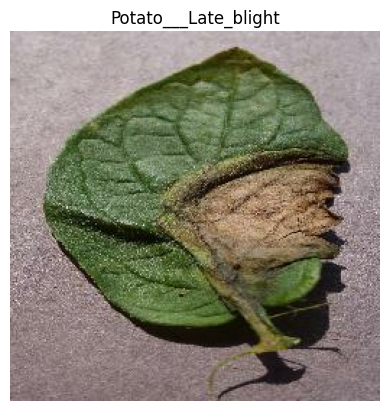

In [69]:
for image_batch,label_batch in dataset.take(1):
    
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

In [70]:
len(dataset)
# we have 88*32 data size

68

In [71]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [72]:
train_dataset=dataset.take(54)

In [73]:
test_dataset=dataset.skip(54)

In [74]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [75]:
val_dataset=test_dataset.take(6)

In [76]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_spli=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return  train_ds,test_ds,val_ds

In [77]:
 train_ds,test_ds,val_ds=get_dataset_partitions_tf(dataset)

In [78]:
len(train_ds)

54

In [79]:
len(val_ds)

6

In [80]:
len(test_ds)

8

In [81]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [82]:
# preprocessing

In [83]:
resize_and_rescale=tf.keras.Sequential([
    keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [84]:
data_augmentation=tf.keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [88]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
    
    
])
model.build(input_shape)

In [89]:
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   multiple                  0         
                                                                 
 conv2d_18 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (32, 60, 60, 64)        

In [90]:
model.compile(
optimizer='adam',
metrics=['accuracy'],
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False))

In [93]:
history=model.fit(
train_ds,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds)

Epoch 1/15
54/54 [==============================] - 83s 2s/step - loss: 0.8305 - accuracy: 0.5451 - val_loss: 0.6901 - val_accuracy: 0.5938
Epoch 2/15
54/54 [==============================] - 70s 1s/step - loss: 0.5265 - accuracy: 0.7812 - val_loss: 0.3323 - val_accuracy: 0.8802
Epoch 3/15
54/54 [==============================] - 70s 1s/step - loss: 0.3916 - accuracy: 0.8600 - val_loss: 0.2746 - val_accuracy: 0.9167
Epoch 4/15
54/54 [==============================] - 68s 1s/step - loss: 0.2842 - accuracy: 0.8935 - val_loss: 0.1754 - val_accuracy: 0.9375
Epoch 5/15
54/54 [==============================] - 69s 1s/step - loss: 0.1868 - accuracy: 0.9230 - val_loss: 0.1278 - val_accuracy: 0.9635
Epoch 6/15
54/54 [==============================] - 67s 1s/step - loss: 0.1637 - accuracy: 0.9358 - val_loss: 0.0914 - val_accuracy: 0.9740
Epoch 7/15
54/54 [==============================] - 67s 1s/step - loss: 0.1468 - accuracy: 0.9398 - val_loss: 0.1658 - val_accuracy: 0.9271
Epoch 8/15
54/54 [==

In [94]:
model.evaluate(test_ds)

8/8 [==============================] - 4s 372ms/step - loss: 0.0468 - accuracy: 0.9922


[0.046825554221868515, 0.9921875]

In [95]:
history

In [96]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 54}

In [97]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [98]:
acc=history.history['accuracy']

val_acc=history.history['val_accuracy']


loss=history.history['loss']

val_loss=history.history['val_loss']

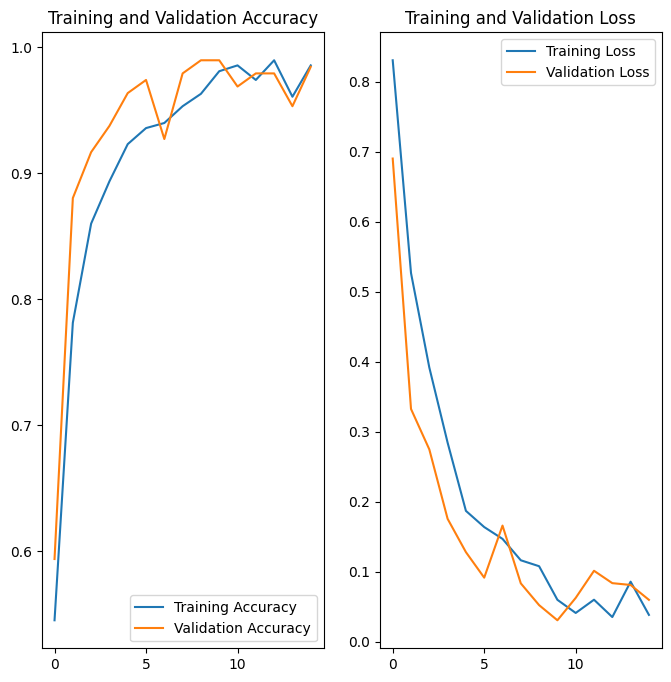

In [100]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)

plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
first image's actual label: Potato___Late_blight
1/1 [==============================] - 0s 305ms/step
predicted label: Potato___Late_blight


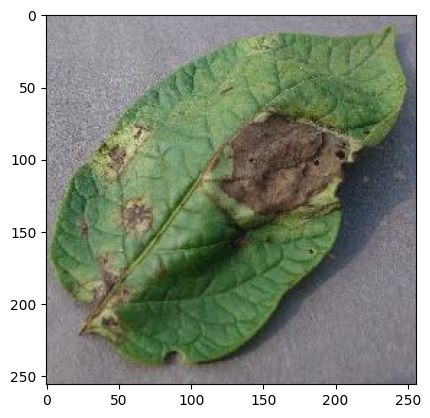

In [115]:
for image_batch,labels_batch in test_ds.take(1):
    first_image=(image_batch[0].numpy().astype("uint8"))
    first_label=(label_batch[0].numpy())
    
    print("first image to predict")
    plt.imshow(first_image)
    
    print("first image's actual label:",class_names[first_label])
    
    
    
    batch_prediction=model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [116]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 51ms/step


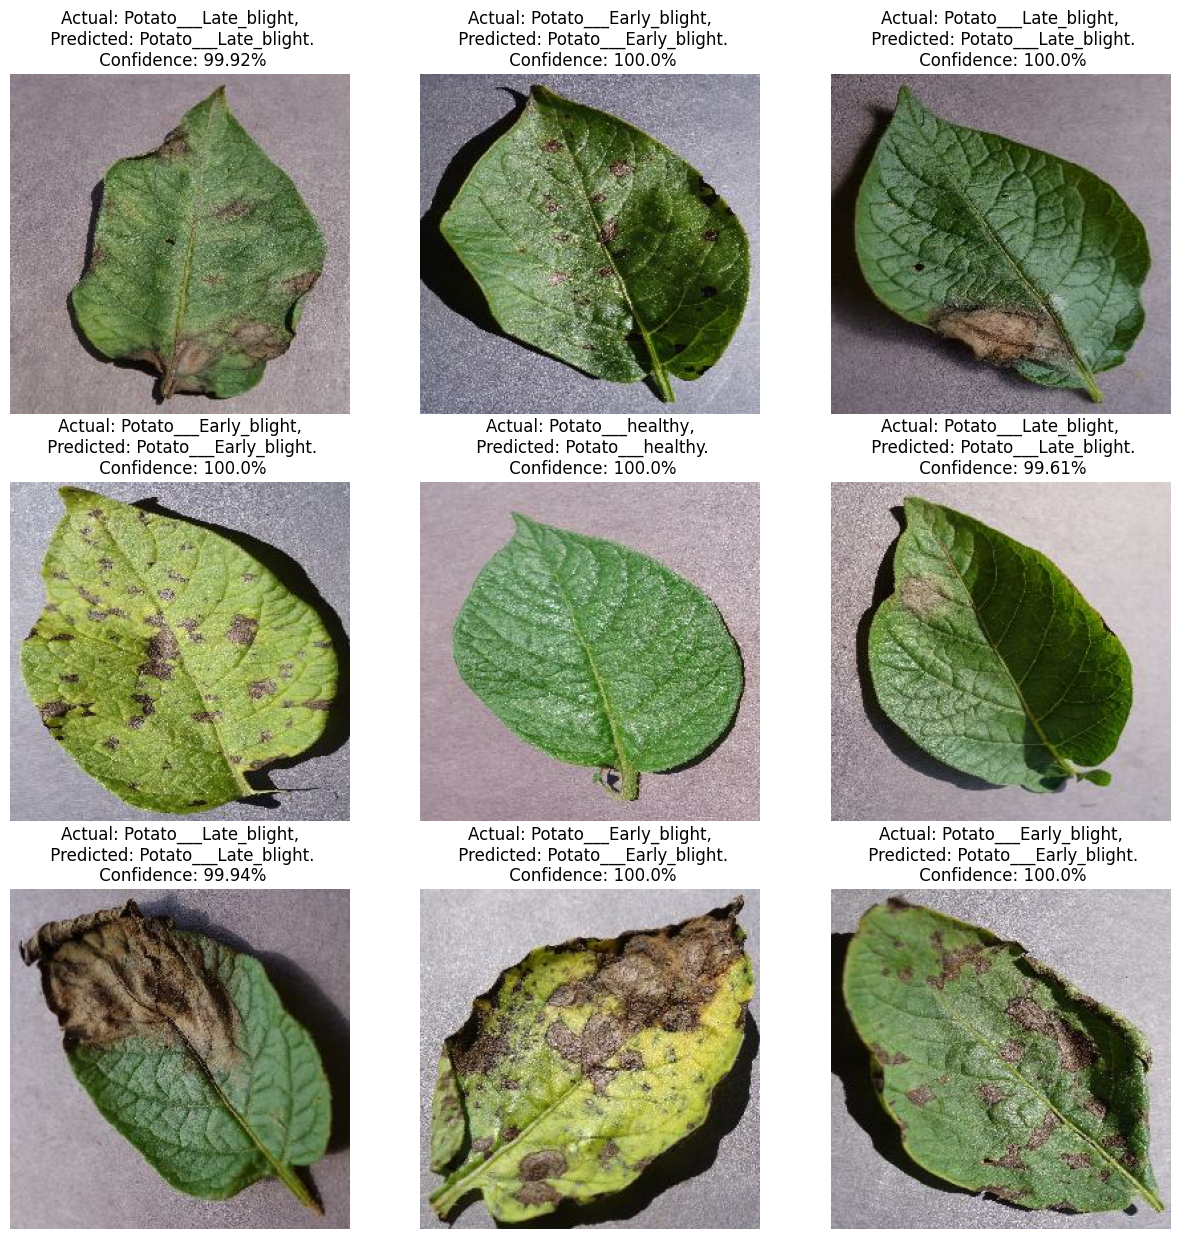

In [120]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [123]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [128]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
